In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import random
from GraphLaplacian.binary import GraphLaplacian, MBOBinary
from GraphLaplacian.helper import plot
from GraphLaplacian.multilabel import GLMultiClass, MBOMultiClass
import math
import pdb
from IPython.display import clear_output
from sklearn.datasets import make_classification, load_digits
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.svm import LinearSVC
from sklearn.ensemble.forest import RandomForestClassifier
from scipy.stats import multivariate_normal
import itertools
import scipy

matplotlib.rcParams['figure.figsize'] = [7, 7]
sns.set()

In [4]:
def find_h(X, n=10, k=10):
    sample = random.choices(X, k=n)
    tree = scipy.spatial.cKDTree(X)
    _func = lambda point: np.mean([x for x in tree.query(point, k = k+1)[0] if x > 0])
    hs = [_func(x) for x in sample]
    return max(hs)

0.5547197993324477


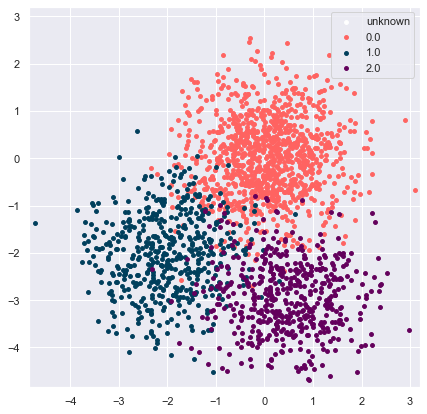

In [5]:
cov = np.array([[0.7,0],[0,0.7]])
one = np.random.multivariate_normal(mean=[0,0], cov=cov, size=1000)
two = np.random.multivariate_normal(mean=[-2,-2], cov=cov, size=500)
tree = np.random.multivariate_normal(mean=[0.5,-3], cov=cov, size=500)

N0 = 30
N01 = N0
N02 = N0
N03 = N0
X0 = list(one[:N01]) + list(two[:N02]) + list(tree[:N03])
Y0 = list(np.ones(N01)*0) + list(np.ones(N02)*1) + list(np.ones(N03)*2)
X1 = list(one[N01:]) + list(two[N01:]) + list(tree[N01:])
Y1 = list(np.ones(len(one) - N01)*0) + list(np.ones(len(two) - N02)*1) + list(np.ones(len(tree) - N03)*2)
X = list(X0) + list(X1)
Y = list(Y0) + list(Y1)
h = find_h(X, 30, 30)
print(h)
plot(X, Y, [])

In [6]:
GL = GLMultiClass(X0, Y0, X1, cov=h)#, weight_matrix=weight_matrix)
GL.solve()

In [ ]:
for i in range(10):
    df = (1/len(X)) * abs(_Y - GL.U).sum()
    L = 0.1
    h = h - (L*df)
    GL = GLMultiClass(X0, Y0, X1, cov=h)#, weight_matrix=weight_matrix)
    GL.solve()
    _Y = np.array([[1 if i==y else 0 for i in range(3)] for y in GL.Y])
    print(h, "|", np.abs(_Y - GL.U).sum()**2)

In [ ]:
GL.U

In [ ]:
X